In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
df.rename(columns={'sepal length (cm)' : 'sepal_lengeth',
                   'sepal width (cm)': 'sepal_width',
                   'petal length (cm)' : 'petal_length',
                   'petal width (cm)' : 'petal_width'},
                   inplace = True
)
df

,sepal_lengeth,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_lengeth  150 non-null    float64
 1   sepal_width    150 non-null    float64
 2   petal_length   150 non-null    float64
 3   petal_width    150 non-null    float64
 4   target         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [14]:
df.describe()

,sepal_lengeth,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

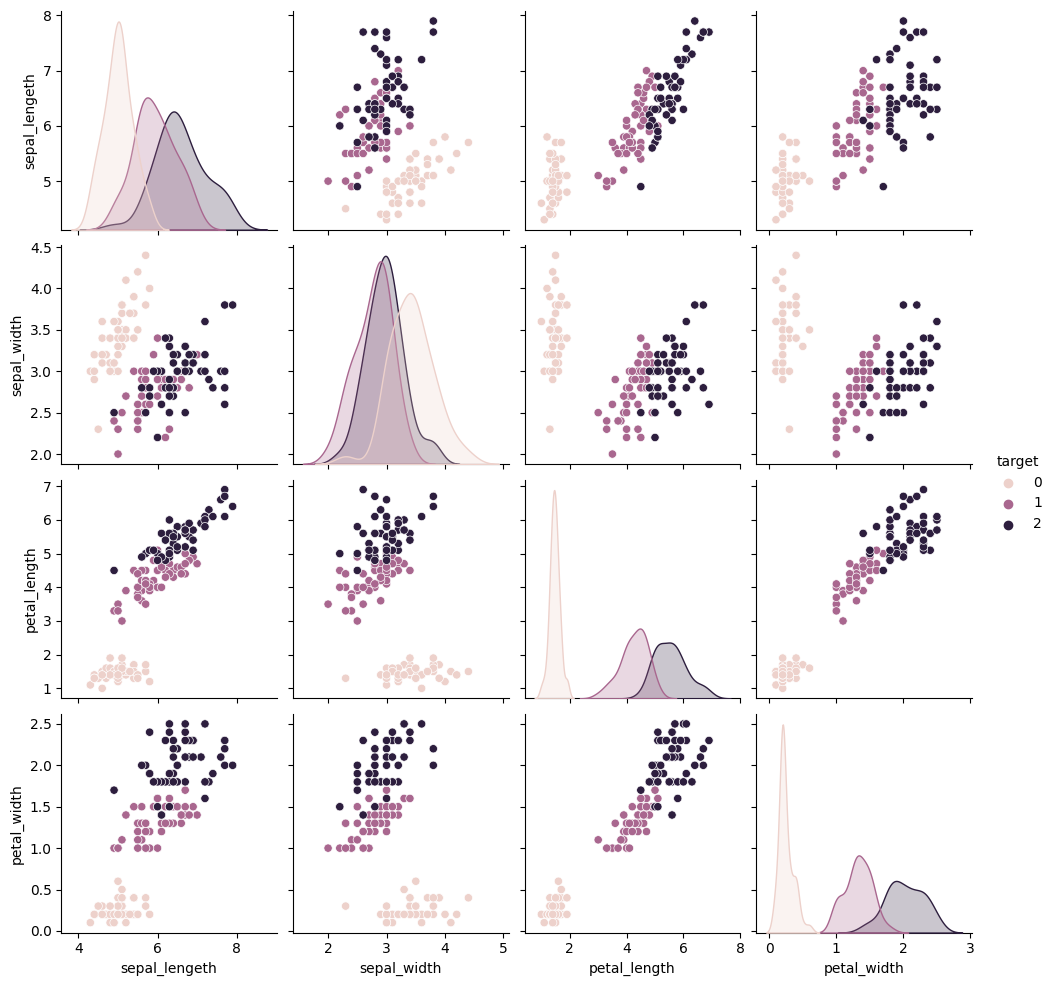

In [17]:
sns.pairplot(df, hue='target')

<Axes: >

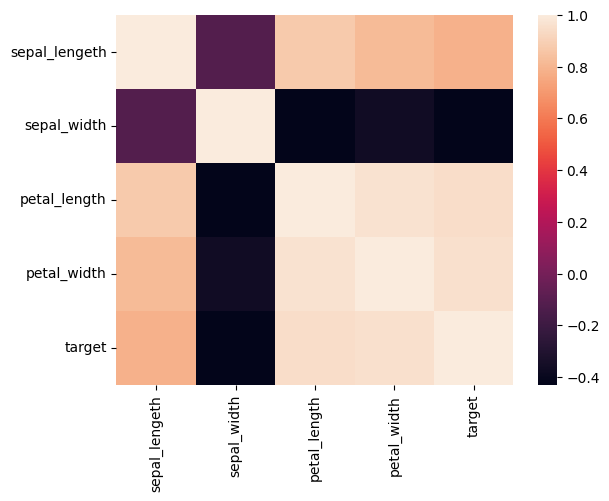

In [18]:
sns.heatmap(df.corr())

In [20]:
x = df.drop('target', axis = 1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
len(x_train), len(x_test), len(y_train), len(y_test)

(120, 30, 120, 30)

In [23]:
model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=500)
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', solver='sag')

In [24]:
print("Model Coefficients:\n",model.coef_)

Model Coefficients:
 [[ 0.22142679  1.21950913 -2.29871934 -0.99649405]
 [ 0.27407417 -0.31049206 -0.09170444 -0.86597755]
 [-0.49550096 -0.90901707  2.39042378  1.86247159]]


In [25]:
print("Model Intercepts:\n",model.intercept_)

Model Intercepts:
 [ 4.57130458  2.79292796 -7.36423254]


In [27]:
y_pred = model.predict(x_test)
y_pred

array([2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0,
       1, 1, 2, 1, 0, 2, 2, 1])

In [30]:
y_pred = model.predict(x_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 1.00


In [33]:
scores_array = cross_val_score(model, x, y, cv=5, scoring='accuracy')
scores_array

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [39]:
print(scores_array.mean())

0.9733333333333334
